In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Data 
df = pd.read_csv("data\diabetes.csv")

In [3]:
print(df.sample(3))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
210            2       81             60             22        0  27.7   
399            3      193             70             31        0  34.9   
721            1      114             66             36      200  38.1   

     DiabetesPedigreeFunction  Age  Outcome  
210                     0.290   25        0  
399                     0.241   25        1  
721                     0.289   21        0  


In [4]:
print(df.shape)

(768, 9)


In [7]:
#data
x = df.drop("Outcome",axis=1).values
#outcome data
y = df['Outcome'].values
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [8]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [14]:
print(y_test, "\n")
print(y_test.shape)

[1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0] 

(308,)


66.88311688311688
69.8051948051948
67.53246753246754
72.40259740259741
71.42857142857143
71.42857142857143
69.8051948051948
72.40259740259741


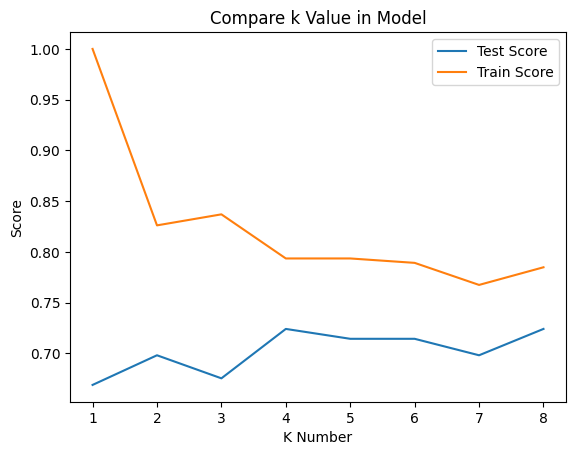

In [23]:
#find k to model
k_neighbors = np.arange(1,9)  #[1,2,3,4,5,6,7,8]

#empty array
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

for i,k in enumerate(k_neighbors):
    #1,2,3,4,5,6,7,8
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    #วัดประสิทธิภาพ model
    train_score[i] = knn.score(x_train,y_train)
    test_score[i] = knn.score(x_test, y_test)

    print(test_score[i]*100)

plt.title("Compare k Value in Model")
plt.plot(k_neighbors, test_score, label="Test Score")
plt.plot(k_neighbors,train_score,label="Train Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=8)

In [33]:
#train
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [34]:
#prediction
y_pred = knn.predict(x_test)


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       204
           1       0.62      0.48      0.54       104

    accuracy                           0.72       308
   macro avg       0.69      0.66      0.67       308
weighted avg       0.71      0.72      0.71       308



In [38]:
print(confusion_matrix(y_test, y_pred))

[[173  31]
 [ 54  50]]


In [39]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Prediction'],margins=True)

Prediction,0,1,All
True,,,
0,173,31,204
1,54,50,104
All,227,81,308
